## DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used as an alternative to K-means. It is particularly useful when dealing with data that has noise and outliers. The algorithm works by grouping together points that are closely packed together, marking points that lie alone in low-density regions as outliers.

Unsupervised method that clusters core samples (dense areas of a dataset) and denotes non-core samples (sparse portions of the dataset) as outliers. The DBSCAN algorithm is based on the concept of density. The density of a cluster is defined as the number of points within a specified radius (eps).

- Use to identify clusters of different shapes and sizes. It is also able to detect outliers in the dataset.
- Outliers are data points that are distant from other data points in the dataset. DBSCAN is able to detect outliers because it classifies data points that are not part of any cluster as outliers.
- Outliers should make up a small portion of the dataset (<5% of the total observations). If the dataset contains a large number of outliers, the DBSCAN algorithm may not be the best choice for clustering the data.


The DBSCAN algorithm has two main parameters:
- `eps`: The maximum distance between two samples for one to be considered as in the neighborhood of the other. (Start at 0.1 and increase by 0.1 until you find the optimal value)
- `min_samples`: The number of samples in a neighborhood for a point to be considered as a core point. (Start at 1 and increase by 1 until you find the optimal value)

In this notebook, we will use the DBSCAN algorithm to cluster the data points in the given dataset.

The steps are as follows:
1. Load the dataset.
2. Preprocess the data.
3. Train the DBSCAN model.
4. Visualize the clusters.

Let's get started.

### Step 1: Load the dataset
    + Import the required libraries.
    + Load the dataset using the `load_data` function

### Step 2: Preprocess the data
    + Normalize the data using the `StandardScaler` function.
    
### Step 3: Train the DBSCAN model
    + Train the DBSCAN model using the `DBSCAN` function.
    
### Step 4: Visualize the clusters
    + Visualize the clusters using the `scatter` function.

### Input
- The input will contain the path to the dataset.

### Output
- The output will contain a scatter plot showing the clusters.

### Example
#### Input
```python    
    "iris.data.csv"
``` 
#### Output
```python
    Scatter plot showing the clusters.
```


### Step 1: Load the dataset
    + Import the required libraries.
    + Load the dataset

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv(filepath_or_buffer='data/iris.data.csv', header=None, sep=',')

df.columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Species']
data = df.iloc[:,0:4].values
target = df.iloc[:,4].values
df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### DBSCan clustering to identify outliers
#### Train your model and identify outliers


In [5]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)


DBSCAN(eps=0.8, min_samples=19)


In [6]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))
print(outliers_df[model.labels_==-1])

Counter({np.int64(1): 94, np.int64(0): 50, np.int64(-1): 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBScan for Outlier Detection')

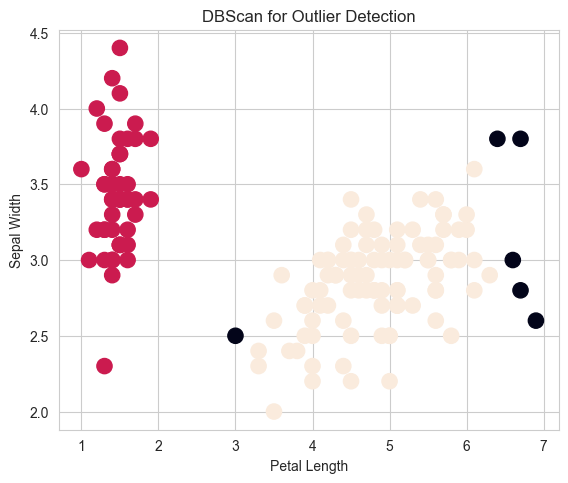

In [7]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(data[:,2], data[:,1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBScan for Outlier Detection')

## Interpreting the results
- 150 total obsevations
- 6 with -1 label (outliers) (4%)   
- 94 with 1 label (62%)
- 50 with 0 label (33%)

- The DBSCAN algorithm is able to detect outliers in the dataset.
- Outliers are data points that are distant from other data points in the dataset. DBSCAN is able to detect outliers because it classifies data points that are not part of any cluster as outliers.
- Outliers should make up a small portion of the dataset (<5% of the total observations). If the dataset contains a large number of outliers, the DBSCAN algorithm may not be the best choice for clustering the data.

## Summary
- The DBSCAN algorithm is a popular clustering algorithm used as an alternative to K-means.
- It is particularly useful when dealing with data that has noise and outliers.
- The algorithm works by grouping together points that are closely packed together, marking points that lie alone in low-density regions as outliers.
    